# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [1]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz

A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
#B= B=W*D*Winv
#Usamosla funcion dot de numpy para multiplicar matrices
B = np.dot(np.dot(W,D),Winv)
B1 = np.dot(W,D)
B2 = Winv
BFinal= np.dot(B1,B2)
#print(B)
#usamos el redondeo y el real, para evitar que nos de el punto despues del numero
#Nos da un numero real redondeado pero solamente entero.
print(B.round(0).real.astype(int))
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------


In [2]:
#Función para descomposición
#para hacer mas rapido todo el rollo, creamos una funcion que replique el procedimiento
def descompositor (Matriz_original):
  A = Matriz_original
  print("-------Matriz original-------")
  print(A)
  print("-----------------------------")
#------------ la eigendescomposición
  values, vectors = eig(A)
  print(values) #D
  print(vectors) #W
#------------------------Reconstrucción
  values, vectors = np.linalg.eig(A)
  W = vectors
  Winv = np.linalg.inv(W)
  D = np.diag(values)

  print("-------Matriz reconstruida-------")
  B = np.dot(np.dot(W,D),Winv)
  #print(B)
  print(B.round(0).real.astype(int))
  print("-----------------------------")

In [3]:
#Matriz 1
#Definmos nuestra matriz a tratar
A=([[3,0,2],[3,0,-2],[0,1,1]])
#Llamamos la funcion para que cumpla el ejercicio
descompositor(A)

-------Matriz original-------
[[3, 0, 2], [3, 0, -2], [0, 1, 1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------


In [4]:
#Matriz 2
A=([[1,3,8],[2,0,0],[0,0,1]])
descompositor(A)

-------Matriz original-------
[[1, 3, 8], [2, 0, 0], [0, 0, 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------


In [5]:
#Matriz 3
A=([[5,4,0],[1,0,1],[10,7,1]])
descompositor(A)

-------Matriz original-------
[[5, 4, 0], [1, 0, 1], [10, 7, 1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


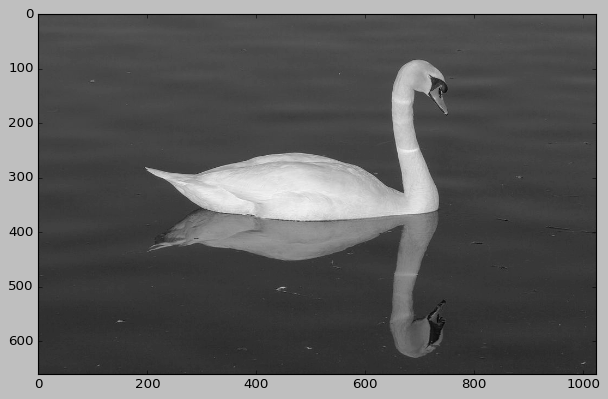

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F0F8DF22DD0>


In [6]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
#Aqui vamos a pegar el link de nuestra imagen que vamos a utilizar
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
#La función convert, regresa una copia de la imagen con las caracteristicas que pongas en el argumento
#Esta es la explciación de porque el LA
"""L : This image mode has one channel that can take any value between 0 and 255 representing white, black and all the shades of gray in between. It’s an 8-bit grayscale image mode. L stands for Luminance channel.
LA : Represents L with Alpha transparency channel. This mode can be used to achieve grayscale images with transparency. And don’t forget only png and gif image file types support transparency channel.
1 : This image mode is true black & white. It only has one channel which takes only two value representing full white or full black. There is no in between meaning no gray."""
imggray = img.convert('LA')
#convertimos los datos de la imagen a un arreglo de datos
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)
#Ahora convertimos el arreglo de datos que nos regreso de la imagen a un solo arreglo unidimensional
imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [7]:
#

In [8]:
#La funcionn linalg.svd, devuelve una descomposicion de un solo valor o single value decomposition
#En especifico, 
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [9]:
#el .shape (), Nos dice el tamaño del arreglo
U.shape

(660, 660)

In [10]:
V.shape

(1024, 1024)

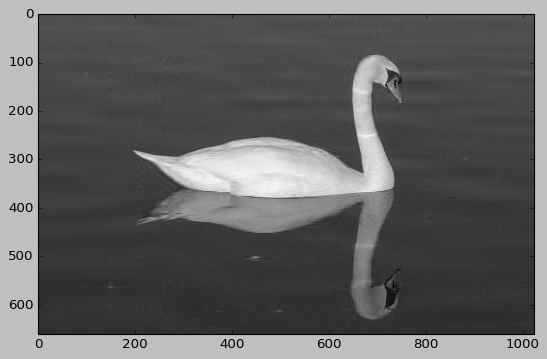

Felicidades la imagen está comprimida


In [11]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
#Diag extrae una diagona, o construye un arreglo en diagonal
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

In [12]:
#Función para compirmir imagenes
def funcionimagen(direccion):
  plt.style.use('classic')
  img = direccion
  imggray = img.convert('LA')
  imgmat = np.array(list(imggray.getdata(band=0)),float)
  print(imgmat)
  imgmat.shape = (imggray.size[1],imggray.size[0])
  plt.figure(figsize=(9,6))
  plt.imshow(imgmat,cmap='gray')
  plt.show()
  print(img)
  U,D,V = np.linalg.svd(imgmat)
  imgmat.shape
  print(U.shape)
  print(D.shape)
  print(V.shape)
  nvalue = 50
  reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
  print("La imagen comprimida queda de la siguiente forma")
  plt.imshow(reconstimg,cmap='gray')
  plt.show()

[255. 255. 255. ... 255. 255. 255.]


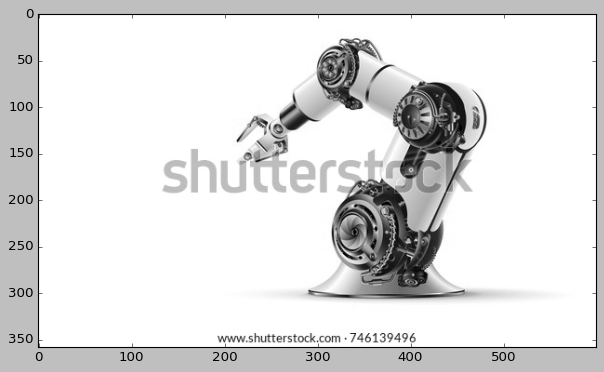

<PIL.Image.Image image mode=LA size=600x358 at 0x7F0F8B339550>
(358, 358)
(358,)
(600, 600)
La imagen comprimida queda de la siguiente forma


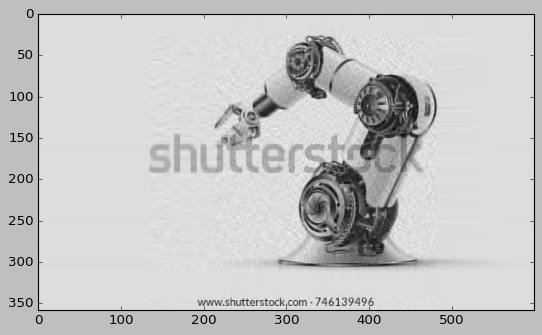

In [13]:
#imagen 1
imagen = Image.open(urllib.request.urlopen('https://image.shutterstock.com/image-vector/robotic-arm-3d-on-white-600w-746139496.jpg')).convert('LA')
funcionimagen(imagen)

[210. 210. 210. ... 255. 255. 255.]


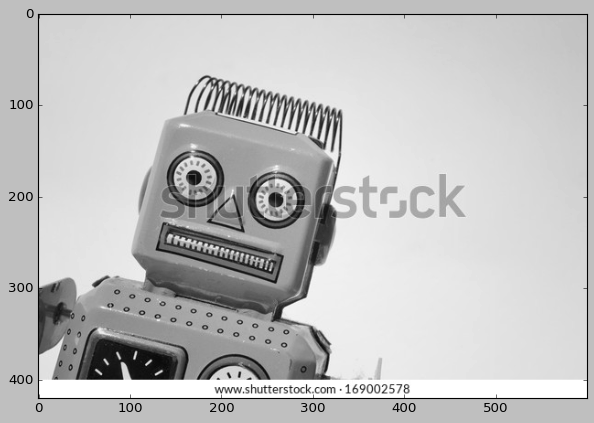

<PIL.Image.Image image mode=LA size=600x420 at 0x7F0F899B7490>
(420, 420)
(420,)
(600, 600)
La imagen comprimida queda de la siguiente forma


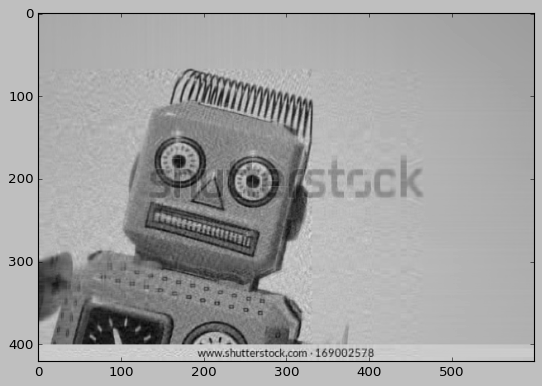

In [14]:
#imagen 2
imagen = Image.open(urllib.request.urlopen('https://image.shutterstock.com/image-photo/vintage-tin-toy-robot-600w-169002578.jpg')).convert('LA')
funcionimagen(imagen)

[245. 245. 246. ... 255. 255. 255.]


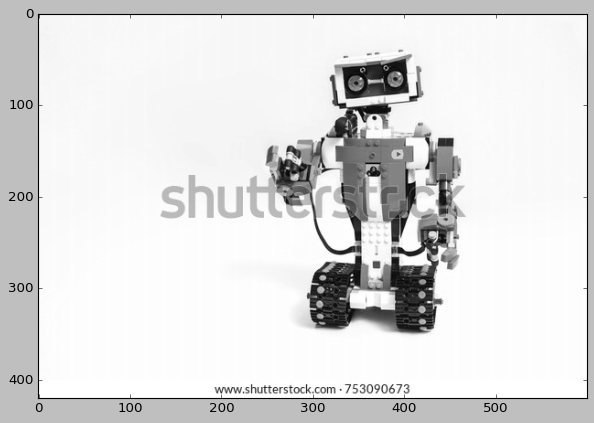

<PIL.Image.Image image mode=LA size=600x420 at 0x7F0F89AADF90>
(420, 420)
(420,)
(600, 600)
La imagen comprimida queda de la siguiente forma


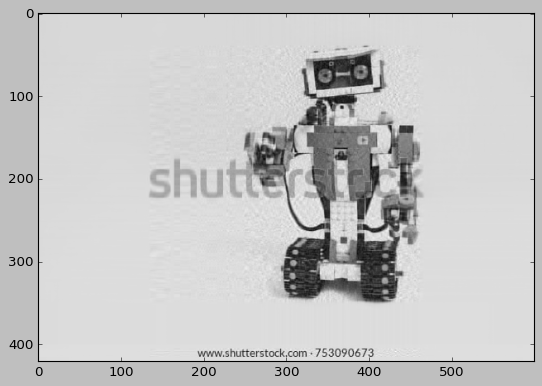

In [15]:
#imagen 3
imagen = Image.open(urllib.request.urlopen('https://image.shutterstock.com/image-photo/robot-plastics-details-programmed-on-600w-753090673.jpg')).convert('LA')
funcionimagen(imagen)

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
iris = datasets.load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
pca = PCA(n_components=2)
X_new = pca.fit_transform(X) 

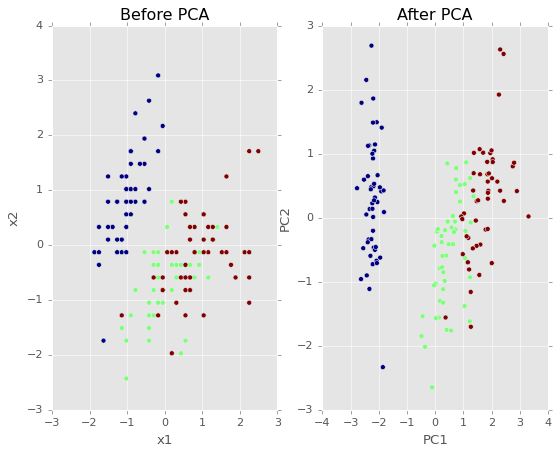

In [17]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [18]:
print(pca.explained_variance_ratio_)
# array([0.72962445, 0.22850762])

[0.72962445 0.22850762]


In [19]:
np.cov(X_new.T)
array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

In [20]:
pca.explained_variance_
array([2.93808505, 0.9201649 ])

array([2.93808505, 0.9201649 ])

In [21]:
print(abs( pca.components_ ))


[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [22]:
def biplot(score, coeff , y):
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)
    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

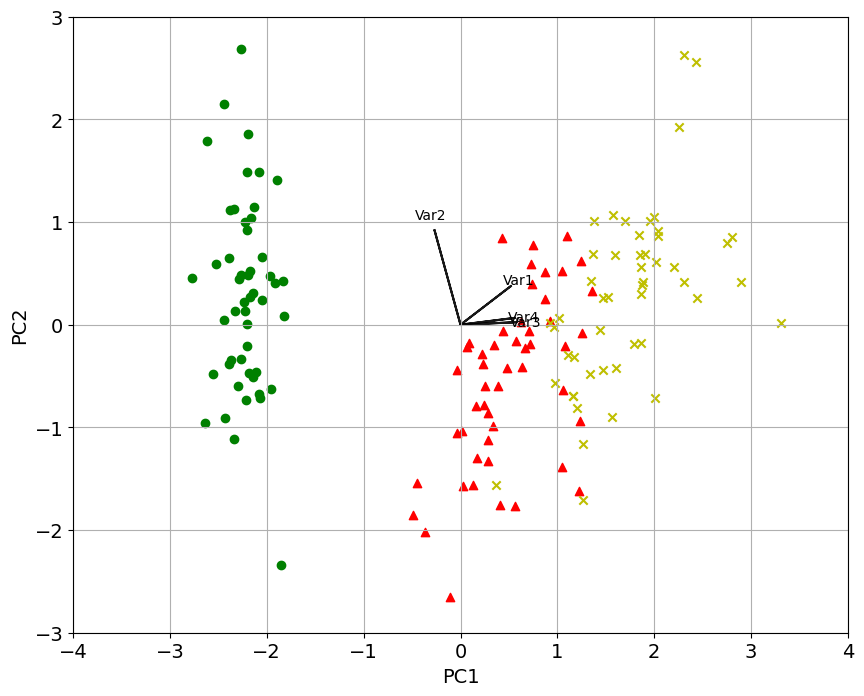

In [23]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [24]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]
0.9628654314027957
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]
-0.42844010433054014

-0.42844010433054014

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

In [25]:
"""***¿Qué es feature importance y para que nos sirve?***
Son técnicas que se aplican para enfocarse en una predicción, de forma que el análisis de datos o las actividades que se realizan a un modelo de información nos permita conocer la importancia de cada característica, entiendo por característica, una columna. De esta forma, una columna con mas importancia significa que su información tiene mas peso o efecto en un modelo predictivo

***¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?***
El primer hallazgo de observar la agrupación de los datos de cada vector y una gran varianza entre estos, después de aplicación del PCA, en este caso, al analizar las magnitudes de los valores en los eigenvecotes, se observaron los que tiene mas importancia, de una forma clara, comprobando que en el primer componente principal se observaron los de los elementos principales. Finalmente, las líneas de covarianza nos permiten observar gráficamente 

***¿Dónde lo aplicarías o te sería de utilidad este conocimiento? ***
Yo aplicaría este método para una actividad como el sector comercial de venta de vehículos, considerando elementos clave como color y tamaño del vehículo, así como precio y zona comercial de venta. Considero que esto demostraría una clara tendencia de qué vehículos se venden mas en qué región, así como conocer hacia qué estado de la republica abastecer mas de un color de choche. Acemas, estimo con base en el ejercicio, asignar más peso a variables específicas de la compra de los coches, como ubicación, fecha y forma de pago, para estimar ganancias de locales"""



'***¿Qué es feature importance y para que nos sirve?***\nSon técnicas que se aplican para enfocarse en una predicción, de forma que el análisis de datos o las actividades que se realizan a un modelo de información nos permita conocer la importancia de cada característica, entiendo por característica, una columna. De esta forma, una columna con mas importancia significa que su información tiene mas peso o efecto en un modelo predictivo\n\n***¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?***\nEl primer hallazgo de observar la agrupación de los datos de cada vector y una gran varianza entre estos, después de aplicación del PCA, en este caso, al analizar las magnitudes de los valores en los eigenvecotes, se observaron los que tiene mas importancia, de una forma clara, comprobando que en el primer componente principal se observaron los de los elementos principales. Finalmente, las líneas de covarianza nos permiten observar gráficamente \n\n***¿Dónde lo aplicaría